## DSC 530 ThinkStats
## Final Assesement
## Joseph Rochelle



**Importing Libraries that will be used:** The libraries are a combination of common Python libraries and thinkstats2, which acts as a wrapper to some other libraries from Allen B. Downey from *Think Stats Exploratory Data Analysis.* 

In [21]:
import pandas as pd
import numpy as np
import thinkstats2  
from thinkstats2 import Cdf
import thinkplot  
import matplotlib.pyplot as plt 
import statsmodels.api as sm

**Dataset:** The data that was selected for this project was from the New York Times and Covid data. The data is available on GitHub that retrieved information for others to use at the following: https://github.com/nytimes/covid-19-data/blob/master/live/us-states.csv

It is important to note that this project selected states so that the aggregated data would be able to do a simple regression. There are other hypothesis tests that could be conducted by adding additional influencing variables at a county level. For example, one could examine if the spread of Covid was related to other attributes that are not in this data set but locating additional data at a state or county level. 

For this project, we kept the data simply as the influencing or moderating data mentioned here would require consistent data operational definitions with a general understanding of replicability before adding to the model. The primary focus of this project is the relationships between `cases` and `deaths`.


In [2]:
Covid = pd.read_csv("us-states.csv")

In [3]:
Covid.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-08-02,Alabama,1,89349,1603,86780.0,1553.0,2569.0,50.0
1,2020-08-02,Alaska,2,3825,22,3825.0,22.0,0.0,0.0
2,2020-08-02,Arizona,4,177008,3753,NaN,NaN,NaN,NaN
3,2020-08-02,Arkansas,5,43173,458,43173.0,458.0,0.0,0.0
4,2020-08-02,California,6,509507,9365,509507.0,9365.0,0.0,0.0


**Data Cleaning:** The data data is rather clean; howerver, there are some data missing from confirmed cases to probable deaths as some states did not report any likage. It is also important to note that there have been some states that were required to change procedures for recording the data that have caused some inconclusive results in terms of replicability of all 5 constructs.

The NaN data will be handled by skipping over during testing.

**Histograms:** The purpose of doing histograms is to determine if there are any outliers with explaining the data or reasons why it should be handled in a certain way. 

After reviewing, you can tell the data is skewed slightly too some states having less cases and deaths compared to hotspots that are more than 5-10X that of other states.  Certainly an example of not having a federal level amount of regulations and perfect example of why state level governance of a pandemic does not work.


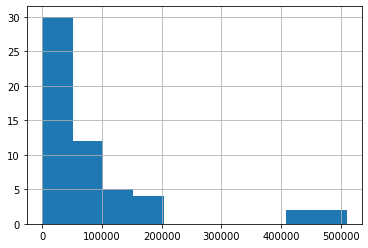

In [7]:
Covid['cases'].hist ()

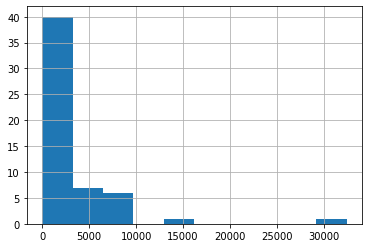

In [8]:
Covid['deaths'].hist ()

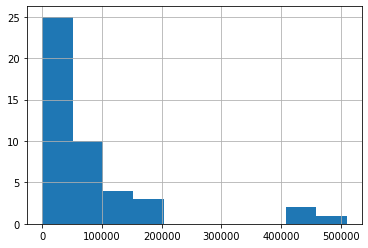

In [9]:
Covid['confirmed_cases'].hist ()

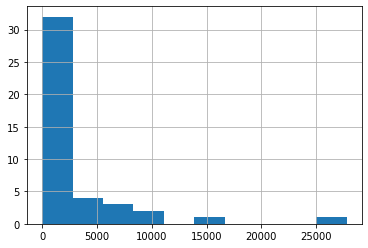

In [10]:
Covid['confirmed_deaths'].hist ()

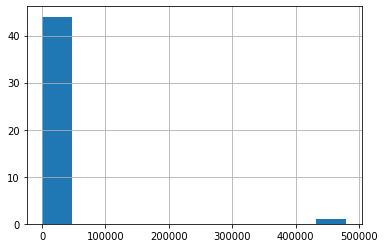

In [11]:
Covid['probable_cases'].hist ()

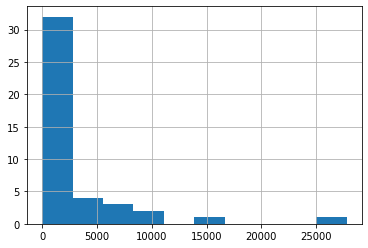

In [12]:
Covid['confirmed_deaths'].hist ()

**Descriptive Characteristics:** The purpose of this next section is to understand what the descriptive statistics look like for the variables selected. By reviewing these, we get a general idea of what the ranges are for the data

In [13]:
Covid['cases'].describe()

count        55.000000
mean      84154.290909
std      118981.755840
min          44.000000
25%       13541.000000
50%       47357.000000
75%       91768.500000
max      509507.000000
Name: cases, dtype: float64

In [14]:
Covid['deaths'].describe()

count       55.000000
mean      2816.527273
std       5122.364728
min          2.000000
25%        268.500000
50%        955.000000
75%       3510.500000
max      32390.000000
Name: deaths, dtype: float64

In [15]:
Covid['confirmed_cases'].describe()

count        45.000000
mean      75640.622222
std      114531.122187
min           0.000000
25%        6595.000000
50%       43173.000000
75%       89816.000000
max      509507.000000
Name: confirmed_cases, dtype: float64

In [16]:
Covid['confirmed_deaths'].describe()

count       43.000000
mean      2769.186047
std       4976.697271
min          2.000000
25%        133.000000
50%        871.000000
75%       3074.500000
max      27764.000000
Name: confirmed_deaths, dtype: float64

In [17]:
Covid['probable_cases'].describe()

count        45.000000
mean      12740.377778
std       71362.318544
min           0.000000
25%           0.000000
50%         109.000000
75%        1651.000000
max      480020.000000
Name: probable_cases, dtype: float64

In [18]:
Covid['probable_deaths'].describe()

count      43.000000
mean      249.348837
std       798.742192
min         0.000000
25%         0.000000
50%         0.000000
75%       112.000000
max      4626.000000
Name: probable_deaths, dtype: float64

In [75]:
Covid['cases'].sum()

4628486

In [73]:
Covid['deaths'].sum()

154909

**Descriptive statistics summary:** Based off the `describe()`and `sum()` functions, we learn that for the `cases` we have approximately 4.6M and `deaths` we have 154K. 

This data is also live as i went to the following link that pulled the same amount: https://www.google.com/search?q=how+many+covid+deaths+in+the+us&rlz=1C1GCEA_enUS885US885&oq=how+many+covid+deaths+in+the+us&aqs=chrome..69i57j0l7.4548j0j7&sourceid=chrome&ie=UTF-8. 

It is important to note that the data was ran on 8/2 and the website reviewed on 8/4 matching. If a user were to examine these later, the entire project would need to be refreshed. 
        

**CDF and PMF:** The purpose of cumlative distrubition funciton (CDF)is to examine the entire distrubition and put each case to the % it would fall in the distrubition. This is a good analysis to use when trying to determine high wide spread cases by utilizing a `>X` funciton to pin point the states or counties with the wide spread. 

The probability mass function (PMF) gives the probability that the discrete random variable is equal to some value so our highest number of 509507 would be equal to 1 or 100 in this modeling. This is also good when you are looking to do a measure of keeping cases below a certain number like 10% of positive cases to negative as an example. 

In [4]:
def CDF (data):
    
    n=len(data)
    
    x= np.sort(data)
    
    y= np.arange(1,len(x)+1) /n
    
    return x,y

In [5]:
data =Covid['cases']

In [6]:
CDF(data)

(array([    44,    421,   1328,   1421,   2174,   2769,   3825,   3937,
          4081,   6606,   6613,   6735,   8867,  12205,  14877,  17872,
         18817,  19022,  20796,  21231,  26391,  28147,  31612,  37706,
         40759,  43173,  45295,  47357,  49207,  49810,  51985,  55228,
         58064,  59647,  59881,  68773,  89349,  89925,  90599,  90801,
         91450,  92087, 105455, 116394, 117468, 118040, 124078, 174834,
        177008, 182232, 183904, 420477, 448182, 480020, 509507],
       dtype=int64),
 array([0.01818182, 0.03636364, 0.05454545, 0.07272727, 0.09090909,
        0.10909091, 0.12727273, 0.14545455, 0.16363636, 0.18181818,
        0.2       , 0.21818182, 0.23636364, 0.25454545, 0.27272727,
        0.29090909, 0.30909091, 0.32727273, 0.34545455, 0.36363636,
        0.38181818, 0.4       , 0.41818182, 0.43636364, 0.45454545,
        0.47272727, 0.49090909, 0.50909091, 0.52727273, 0.54545455,
        0.56363636, 0.58181818, 0.6       , 0.61818182, 0.63636364,
      

In [7]:
def CDF (data2):
    
    n=len(data2)
    
    x= np.sort(data2)
    
    y= np.arange(1,len(x)+1) /n
    
    return x,y

In [8]:
data2 =Covid['deaths']

In [9]:
CDF(data2)

(array([    2,     6,     8,    22,    25,    26,    57,    61,   107,
          116,   123,   134,   197,   225,   312,   329,   338,   358,
          416,   458,   549,   585,   585,   651,   758,   832,   871,
          955,  1007,  1056,  1311,  1603,  1646,  1676,  1693,  1751,
         1846,  1989,  2215,  2971,  3506,  3515,  3744,  3753,  3949,
         4432,  6460,  7021,  7270,  7471,  7707,  8626,  9365, 15830,
        32390], dtype=int64),
 array([0.01818182, 0.03636364, 0.05454545, 0.07272727, 0.09090909,
        0.10909091, 0.12727273, 0.14545455, 0.16363636, 0.18181818,
        0.2       , 0.21818182, 0.23636364, 0.25454545, 0.27272727,
        0.29090909, 0.30909091, 0.32727273, 0.34545455, 0.36363636,
        0.38181818, 0.4       , 0.41818182, 0.43636364, 0.45454545,
        0.47272727, 0.49090909, 0.50909091, 0.52727273, 0.54545455,
        0.56363636, 0.58181818, 0.6       , 0.61818182, 0.63636364,
        0.65454545, 0.67272727, 0.69090909, 0.70909091, 0.72727273,


In [36]:
x_pmf

Pmf({585: 0.03636363636363636, 22: 0.01818181818181818, 1311: 0.01818181818181818, 57: 0.01818181818181818, 312: 0.01818181818181818, 1846: 0.01818181818181818, 3506: 0.01818181818181818, 1056: 0.01818181818181818, 329: 0.01818181818181818, 3753: 0.01818181818181818, 2215: 0.01818181818181818, 549: 0.01818181818181818, 3744: 0.01818181818181818, 1693: 0.01818181818181818, 6460: 0.01818181818181818, 7707: 0.01818181818181818, 26: 0.01818181818181818, 25: 0.01818181818181818, 1989: 0.01818181818181818, 9365: 0.01818181818181818, 7471: 0.01818181818181818, 651: 0.01818181818181818, 8: 0.01818181818181818, 6: 0.01818181818181818, 358: 0.01818181818181818, 2: 0.01818181818181818, 3515: 0.01818181818181818, 61: 0.01818181818181818, 123: 0.01818181818181818, 832: 0.01818181818181818, 758: 0.01818181818181818, 116: 0.01818181818181818, 7021: 0.01818181818181818, 1007: 0.01818181818181818, 1646: 0.01818181818181818, 3949: 0.01818181818181818, 107: 0.01818181818181818, 955: 0.01818181818181818, 

*Note:* The data i'm using for Covid were cases by state that were discrete in that they were at the time of analysis. From a PMF perspective, the data was treated as a dicitonary as the probability to get that same number would have to be examined by the distrubtion provided. If this was a PMF on rolling a dice we would have had each number by probablity of each roll.  Adding the PMF just as part of the assignment. 


x_pmf= thinkstats2.MakePmfFromDict(Covid.deaths)

In [83]:
# The following was set up for the PMF for mean of deaths
Covid_death_mean = Covid['deaths'].mean()

In [84]:
# The following was set up for the PMF for std of deaths
Covid_death_std = Covid['deaths'].std()

In [82]:
# The following objects summarize the mean and STD of what was created. 
Covid_death_mean,Covid_death_std

(2816.5272727272727, 5122.364727547249)

**Analytical distributions and plots:** The purpose of this section is to examine one analytical plot and various others to determine any visual covariance, correlations, or non-linear relationships to consider.

In [22]:
Covid1 = Covid.dropna(subset=['cases','deaths'])

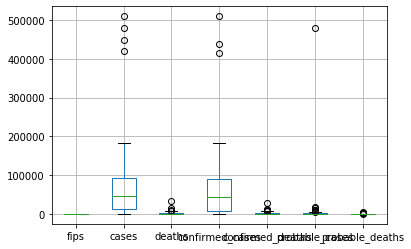

In [32]:
#The following plot was used to indicate that there are still significant cases and deaths within the tail of the box plot indicating it is not a few outliers. 
Covid1.boxplot()

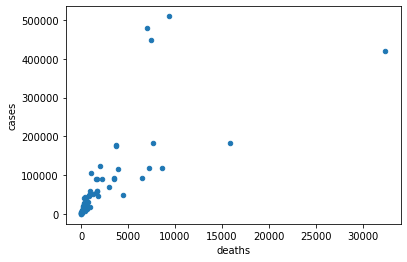

In [71]:
Covid.plot.scatter ( x= 'deaths', y='cases')

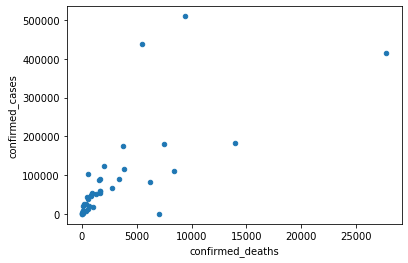

In [73]:
Covid.plot.scatter ( x= 'confirmed_deaths', y='confirmed_cases')

**Hypothesis testing:** In order to determine if cases to deaths have statistical significance, the user conducted several exploratory data analysis procedures to test. First, the data was collected from a reputable source that has validity and replicability in the data set. Next, the data was examined for outliers and distributions. Once the data was examined the two variables that did not have missing values were `cases` and `deaths`. The dependent variable of `deaths` was tested against the independent variable of `cases` to determine significant significance. Correlations were tested to determine if the variables had any correlations to which could dilute statistical power. Finally, a simple regression was conducted. 
    
    Omnibus HO: There is not a relationship between cases and deaths
    Omnibus HA: There is a relationship between cases and deaths


In [34]:
## The following shows a high correlation to number of cases and deaths across all 5 constructs

Covid.corr()

,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
fips,1.000000,-0.215818,-0.115370,-0.215205,-0.180428,-0.168712,0.062649
cases,-0.215818,1.000000,0.708106,0.835072,0.715310,0.469499,0.548024
deaths,-0.115370,0.708106,1.000000,0.722704,0.997357,0.121815,0.891651
confirmed_cases,-0.215205,0.835072,0.722704,1.000000,0.717112,-0.093671,0.640723
confirmed_deaths,-0.180428,0.715310,0.997357,0.717112,1.000000,0.143734,0.856399
probable_cases,-0.168712,0.469499,0.121815,-0.093671,0.143734,1.000000,-0.035052
probable_deaths,0.062649,0.548024,0.891651,0.640723,0.856399,-0.035052,1.000000


In [35]:
## Creating two variables for regression testing as an example
x = Covid['cases']
y= Covid['deaths']

In [47]:
# A simple regression was used to conduct the tests. 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              87.20
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                    7.29e-13
Time:                        18:49:06   Log-Likelihood:                         -528.26
No. Observations:                  55   AIC:                                      1059.
Df Residuals:                      54   BIC:                                      1061.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cases          0.0315      0.003      9.338      0.000       0.025       0.038
==============================================================================
Omnibus:                       58.314   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.559
Skew:                           2.666   Prob(JB):                    1.99e-104
Kurtosis:                      16.415   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Outcome and analysis:**

First of all the RSquared value indicates the model only explains 61% of the deaths related to cases. Obviously looking at the data set, we do not have additional constructs to measure as independent variables to the root causes of the deaths other than Covid-19. In other words, what other factors lead to these deaths?

The Durbin-Watson statistic indicates a value of 2.0 out of a 0 to 4 scale which indicates there is no autocorrelation detected. Meaning, results with the p-values will be valid and not diluted by measures that are distributed similarly to the other constructs. 

We can see that p= 0.00 is indicating that Covid Cases to Deaths are statistically significant. The Coef of 0.0315 indicates that as cases increase by 1 so will deaths at 0.0315%

**We reject the null hypothesis and accept the alternative: There is a relationship between `cases` and `deaths`.**
